In [1]:
import pandas as pd

playlists = []
for i in range(0, 15000, 1000):
    playlists.append(pd.read_csv(f'D:\\million_playlist_dataset_csv\\playlists_{i}-{i+999}.csv',  dtype=str))
playlists = pd.concat(playlists, ignore_index=True)
playlists

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
0,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37
1,Awesome Playlist,false,1,1506556800,39,23,1,5,11656470,21
2,korean,false,2,1505692800,64,51,1,18,14039958,31
3,mat,false,3,1501027200,126,107,1,4,28926058,86
4,90s,false,4,1401667200,17,16,2,7,4335282,16
...,...,...,...,...,...,...,...,...,...,...
14995,Mix,false,14995,1509408000,183,148,1,54,42537814,121
14996,Tunage,false,14996,1495929600,18,17,1,4,4011515,13
14997,Eric,false,14997,1501891200,36,27,1,4,8354470,17
14998,walking on a dream,false,14998,1392249600,61,39,1,3,14245495,27


In [2]:
import csv

with open('D:\\extracted_features\\all_playlists.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    
    writer.writerow(playlists.columns)
    
    writer.writerows(playlists.values)

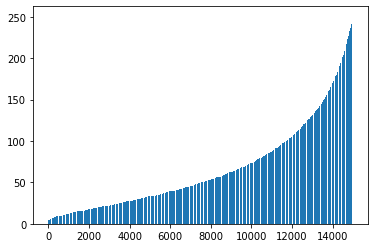

In [8]:
import matplotlib.pyplot as plt

plt.bar(range(0,15000), sorted([int(i) for i in playlists['num_tracks']]))
plt.show()

In [6]:
min([int(i) for i in playlists['num_tracks']])

5

In [7]:
max([int(i) for i in playlists['num_tracks']])

250

In [2]:
playlists_tracks = []
for i in range(0, 15000, 1000):
    playlists_tracks.append(pd.read_csv(f'D:\\million_playlist_dataset_csv\\playlist_tracks_{i}-{i+999}.csv',  dtype=str))
playlists_tracks = pd.concat(playlists_tracks, ignore_index=True)
playlists_tracks

,pid,track_uri,pos
0,0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,0
1,0,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,1
2,0,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,2
3,0,spotify:track:1AWQoqb9bSvzTjaLralEkT,3
4,0,spotify:track:1lzr43nnXAijIGYnCT8M8H,4
...,...,...,...
998404,14999,spotify:track:5hTpBe8h35rJ67eAWHQsJx,28
998405,14999,spotify:track:3kxfsdsCpFgN412fpnW85Y,29
998406,14999,spotify:track:6eT7xZZlB2mwyzJ2sUKG6w,30
998407,14999,spotify:track:4Q3N4Ct4zCuIHuZ65E3BD4,31


In [22]:
#generating positive examples

indexes_removal = []
positive_samples = []

for i in range(0, 15000):
    current_playlist = playlists_tracks[playlists_tracks.pid == str(i)]
    if int(playlists['num_tracks'][i]) > 50:
        starting_point = int(playlists['num_tracks'][i]) - int(int(playlists['num_tracks'][i]) * 0.1)
        for j in range(0, int(int(playlists['num_tracks'][i]) * 0.1)):
            indexes_removal.append(current_playlist[current_playlist['pos'] == str(starting_point+j)].index[0])
            positive_samples.append(current_playlist[current_playlist['pos'] == str(starting_point+j)].values[0])

In [23]:
prev_len = len(playlists_tracks)
playlists_tracks = playlists_tracks.drop(indexes_removal, axis=0)
test_len = len(playlists_tracks)
num_samples = test_len - prev_len
print(num_samples)

-75974


In [31]:
all_samples=[]
for sample in positive_samples:
    sample[2] = 1
    all_samples.append(list(sample))
print(all_samples[:10])

[['0', 'spotify:track:3jkdQNkDTxxXtjSO4l0o1H', 1], ['0', 'spotify:track:5c1sfI6wIQEsSUw0xrkFdl', 1], ['0', 'spotify:track:6sqNctd7MlJoKDOxPVCAvU', 1], ['0', 'spotify:track:1b7vg5T9YKR3NNqXfBYRF7', 1], ['0', 'spotify:track:6GIrIt2M39wEGwjCQjGChX', 1], ['2', 'spotify:track:1jHmGj123EpOxXd9S1PpFF', 1], ['2', 'spotify:track:6NB81kD2XDeTdNBksV0yxM', 1], ['2', 'spotify:track:7iV733e1KacKrFRaBNxVEf', 1], ['2', 'spotify:track:5SE57ljOIUJ1ybL9U6CuBH', 1], ['2', 'spotify:track:3ryjLm3oupIjJFGc39naNi', 1]]


In [16]:
unique_tracks = list(set(playlists_tracks['track_uri']))
pairs = []
[[pairs.append([playlist, track]) for track in unique_tracks[:200]]for playlist in playlists.pid]
        
print(len(pairs))

3000000


In [4]:
import copy
few_samples = copy.deepcopy(playlists_tracks)
few_samples = few_samples.drop('pos', axis=1)
few_samples

,pid,track_uri
0,0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI
1,0,spotify:track:6I9VzXrHxO9rA9A5euc8Ak
2,0,spotify:track:0WqIKmW4BTrj3eJFmnCKMv
3,0,spotify:track:1AWQoqb9bSvzTjaLralEkT
4,0,spotify:track:1lzr43nnXAijIGYnCT8M8H
...,...,...
998404,14999,spotify:track:5hTpBe8h35rJ67eAWHQsJx
998405,14999,spotify:track:3kxfsdsCpFgN412fpnW85Y
998406,14999,spotify:track:6eT7xZZlB2mwyzJ2sUKG6w
998407,14999,spotify:track:4Q3N4Ct4zCuIHuZ65E3BD4


In [17]:
negative_samples = set(map(tuple, pairs)) - set(map(tuple, few_samples.values))
print(len(negative_samples))

2998758


In [21]:
negative_samples = list([list(i) for i in negative_samples])

In [32]:
for sample in negative_samples[:75974]:
    all_samples.append(sample)
print(negative_samples[:10])

[['11564', 'spotify:track:07e7Tt9dcJca7JdxwEd304', 0], ['1803', 'spotify:track:66fjBB43iramIyjHulpkMN', 0], ['7854', 'spotify:track:0FsqhyyHNZJfK29IpHihMK', 0], ['11352', 'spotify:track:1QE4KBHZb0Y4ERG18VEm3y', 0], ['6170', 'spotify:track:6agmW4sFkZfrq5wMzyQM8k', 0], ['6159', 'spotify:track:7x0HnmGefWjzGKOFlaztXh', 0], ['12275', 'spotify:track:4W2SU5ENHBiifn4KnRqgte', 0], ['13866', 'spotify:track:6P415bdEuyzdqSp8BHvQ6Z', 0], ['1796', 'spotify:track:6zanFFQdHko2cV8gQfaAL4', 0], ['14170', 'spotify:track:6agmW4sFkZfrq5wMzyQM8k', 0]]


In [33]:
import csv

csv_headers = ['pid','track_uri','link']

with open('D:\\extracted_features\\test_samples.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    
    writer.writerow(csv_headers)
    
    writer.writerows(all_samples)

In [34]:
playlists_tracks

,pid,track_uri,pos
0,0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,0
1,0,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,1
2,0,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,2
3,0,spotify:track:1AWQoqb9bSvzTjaLralEkT,3
4,0,spotify:track:1lzr43nnXAijIGYnCT8M8H,4
...,...,...,...
998404,14999,spotify:track:5hTpBe8h35rJ67eAWHQsJx,28
998405,14999,spotify:track:3kxfsdsCpFgN412fpnW85Y,29
998406,14999,spotify:track:6eT7xZZlB2mwyzJ2sUKG6w,30
998407,14999,spotify:track:4Q3N4Ct4zCuIHuZ65E3BD4,31


In [35]:
import csv

csv_headers = ['pid','track_uri','pos']

with open('D:\\extracted_features\\test_edges_graph.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    
    writer.writerow(csv_headers)
    
    writer.writerows(playlists_tracks.values)

In [42]:
#generating positive examples

indexes_removal = []
positive_samples = []

for i in range(0, 15000):
    current_playlist = playlists_tracks[playlists_tracks.pid == str(i)]
    #print(current_playlist)
    if int(playlists['num_tracks'][i]) > 50:
        starting_point = int(playlists['num_tracks'][i]) - int(int(playlists['num_tracks'][i]) * 0.3)
        for j in range(0, int(int(playlists['num_tracks'][i]) * 0.2)):
            #print(current_playlist[current_playlist['pos'] == str(starting_point+j)].index[0])
            indexes_removal.append(current_playlist[current_playlist['pos'] == str(starting_point+j)].index[0])
            positive_samples.append(current_playlist[current_playlist['pos'] == str(starting_point+j)].values[0])

In [43]:
prev_len = len(playlists_tracks)
playlists_tracks = playlists_tracks.drop(indexes_removal, axis=0)
test_len = len(playlists_tracks)
num_samples = prev_len - test_len
print(num_samples)

155429


In [44]:
all_samples=[]
for sample in positive_samples:
    sample[2] = 1
    all_samples.append(list(sample))
print(all_samples[:10])

[['0', 'spotify:track:1kusepF3AacIEtUTYrw4GV', 1], ['0', 'spotify:track:7oK9VyNzrYvRFo7nQEYkWN', 1], ['0', 'spotify:track:12qZHAeOyTf93YAWvGDTat', 1], ['0', 'spotify:track:2jFlMILIQzs7lSFudG9lbo', 1], ['0', 'spotify:track:4I2GqMe7L2ccMpUbnDzYLH', 1], ['0', 'spotify:track:5lDriBxJd22IhOH9zTcFrV', 1], ['0', 'spotify:track:2eJ8ij1T3cNUKiGdcUvKhy', 1], ['0', 'spotify:track:5y69gQtK33qxb8a24ACkCy', 1], ['0', 'spotify:track:1X5WGCrUMuwRFuYU1eAo2I', 1], ['0', 'spotify:track:3utIAb67sOu0QHxBE88P1M', 1]]


In [45]:
for sample in negative_samples[75974:231403]:
    sample.append(0)
    all_samples.append(sample)
print(negative_samples[:10])

[['11564', 'spotify:track:07e7Tt9dcJca7JdxwEd304', 0], ['1803', 'spotify:track:66fjBB43iramIyjHulpkMN', 0], ['7854', 'spotify:track:0FsqhyyHNZJfK29IpHihMK', 0], ['11352', 'spotify:track:1QE4KBHZb0Y4ERG18VEm3y', 0], ['6170', 'spotify:track:6agmW4sFkZfrq5wMzyQM8k', 0], ['6159', 'spotify:track:7x0HnmGefWjzGKOFlaztXh', 0], ['12275', 'spotify:track:4W2SU5ENHBiifn4KnRqgte', 0], ['13866', 'spotify:track:6P415bdEuyzdqSp8BHvQ6Z', 0], ['1796', 'spotify:track:6zanFFQdHko2cV8gQfaAL4', 0], ['14170', 'spotify:track:6agmW4sFkZfrq5wMzyQM8k', 0]]


In [46]:
print(len(all_samples))

310858


In [47]:
import csv

csv_headers = ['pid','track_uri','link']

with open('D:\\extracted_features\\train_samples.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    
    writer.writerow(csv_headers)
    
    writer.writerows(all_samples)

In [48]:
playlists_tracks

,pid,track_uri,pos
0,0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,0
1,0,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,1
2,0,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,2
3,0,spotify:track:1AWQoqb9bSvzTjaLralEkT,3
4,0,spotify:track:1lzr43nnXAijIGYnCT8M8H,4
...,...,...,...
998404,14999,spotify:track:5hTpBe8h35rJ67eAWHQsJx,28
998405,14999,spotify:track:3kxfsdsCpFgN412fpnW85Y,29
998406,14999,spotify:track:6eT7xZZlB2mwyzJ2sUKG6w,30
998407,14999,spotify:track:4Q3N4Ct4zCuIHuZ65E3BD4,31


In [49]:
import csv

csv_headers = ['pid','track_uri','pos']

with open('D:\\extracted_features\\train_edges_graph.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    
    writer.writerow(csv_headers)
    
    writer.writerows(playlists_tracks.values)